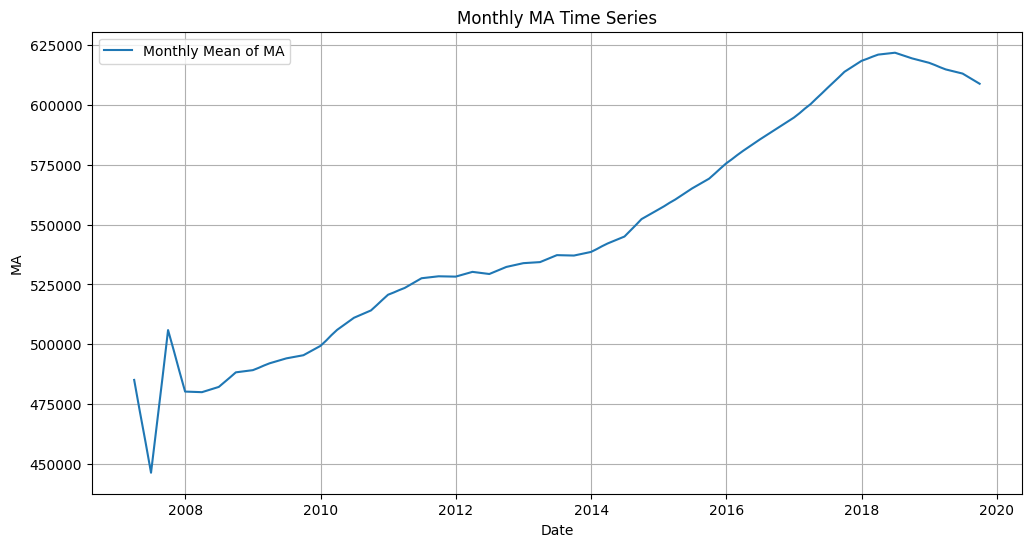

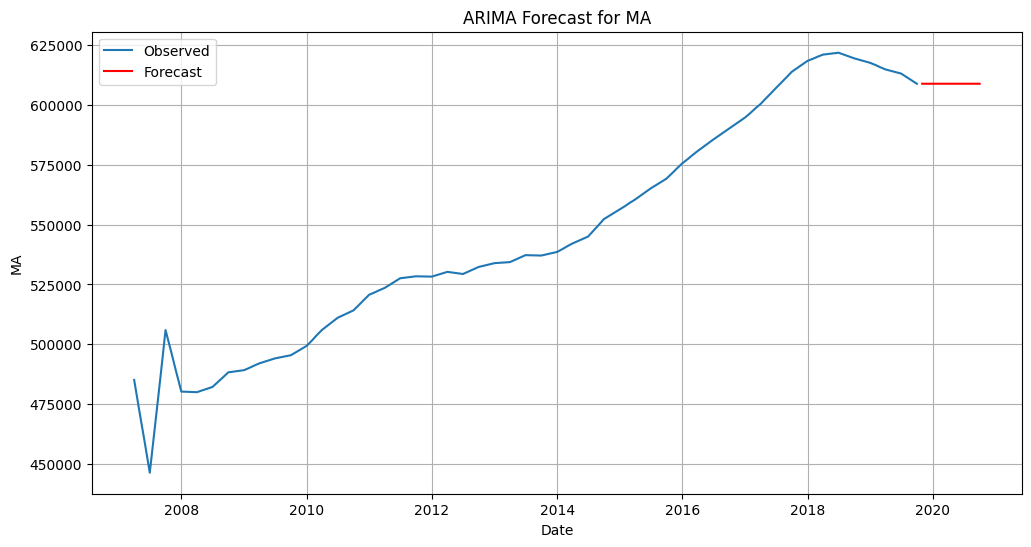

                               SARIMAX Results                                
Dep. Variable:                     MA   No. Observations:                  151
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1443.256
Date:                Mon, 07 Apr 2025   AIC                           2892.511
Time:                        06:36:51   BIC                           2901.543
Sample:                    03-31-2007   HQIC                          2896.181
                         - 09-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8728      0.040    -21.617      0.000      -0.952      -0.794
ma.L1          0.8604      0.042     20.476      0.000       0.778       0.943
sigma2      1.334e+07   8.65e-10   1.54e+16      0.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = "/content/ma_lga_12345.csv"
df = pd.read_csv(file_path)

# Convert 'saledate' to datetime format and set as index
df['saledate'] = pd.to_datetime(df['saledate'], format="%d/%m/%Y")
df.set_index('saledate', inplace=True)

# Resample data monthly and interpolate missing values
monthly_df = df['MA'].resample('ME').mean().interpolate()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_df, label='Monthly Mean of MA')
plt.title('Monthly MA Time Series')
plt.xlabel('Date')
plt.ylabel('MA')
plt.legend()
plt.grid(True)
plt.show()

# Fit ARIMA model (parameters p=1, d=1, q=1 as an example)
model = ARIMA(monthly_df, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_df, label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast for MA')
plt.xlabel('Date')
plt.ylabel('MA')
plt.legend()
plt.grid(True)
plt.show()

# Print model summary
print(model_fit.summary())
